In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [2]:
X = np.array([[68.9, 1060 , 7.8, 5.5,  25.3], [68.1, 1101, 9.5, 15.3, 
    28], [67.6, 1147, 10.1, 30.2, 30], [69.2, 1204, 10.0, 44.5, 23.50],
   [69.2, 1602, 9.8, 58.6, 18], [64.6, 1893, 5.5, 93.3, 38.4],
   [67.0, 2777, 6.2, 122.0, 29.6]])
X

array([[  68.9, 1060. ,    7.8,    5.5,   25.3],
       [  68.1, 1101. ,    9.5,   15.3,   28. ],
       [  67.6, 1147. ,   10.1,   30.2,   30. ],
       [  69.2, 1204. ,   10. ,   44.5,   23.5],
       [  69.2, 1602. ,    9.8,   58.6,   18. ],
       [  64.6, 1893. ,    5.5,   93.3,   38.4],
       [  67. , 2777. ,    6.2,  122. ,   29.6]])

In [3]:
year = np.array([1970, 1975, 1980, 1985, 1990, 1995, 1998])
year

array([1970, 1975, 1980, 1985, 1990, 1995, 1998])

In [6]:
data = pd.DataFrame(data = X, index=year, columns = ['L', 'M', 'P', 'A', 'V'])
data

,L,M,P,A,V
1970,68.9,1060.0,7.8,5.5,25.3
1975,68.1,1101.0,9.5,15.3,28.0
1980,67.6,1147.0,10.1,30.2,30.0
1985,69.2,1204.0,10.0,44.5,23.5
1990,69.2,1602.0,9.8,58.6,18.0
1995,64.6,1893.0,5.5,93.3,38.4
1998,67.0,2777.0,6.2,122.0,29.6


`L` - средняя продолжительность жизни

`M` - количество чиновников

`A` - количество автомобилей

`P` - доходы бедных

`V` - объёмы продажи водки

`k = 5` - количество переменных

`i = 7` - количество объектов

### StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
X_normalise = scaler.fit_transform(X)
(X_normalise.var(axis=0),X_normalise.mean(axis=0))

(array([1., 1., 1., 1., 1.]),
 array([ 1.33226763e-15, -1.90323947e-16, -1.58603289e-16,  9.51619735e-17,
         3.40997072e-16]))

In [21]:
X_normalise = (X - X.mean(axis = 0)) / X.std(axis = 0, ddof = 1)
X_normalise

array([[ 0.67068184, -0.76804053, -0.31914663, -1.12014069, -0.35403938],
       [ 0.18291323, -0.70251508,  0.56407312, -0.88792053,  0.07216089],
       [-0.12194215, -0.62899871,  0.87579773, -0.5348511 ,  0.3878648 ],
       [ 0.85359507, -0.53790235,  0.82384363, -0.19599923, -0.6381729 ],
       [ 0.85359507,  0.09817403,  0.71993542,  0.13811345, -1.50635864],
       [-1.95107443,  0.56324495, -1.51409099,  0.96036239,  1.71382121],
       [-0.48776861,  1.9760377 , -1.15041228,  1.64043572,  0.32472402]])

#### Ковариационная матрица

In [139]:
cov_matrix = np.cov(X_normalise, rowvar=False)
cov_matrix

array([[ 1.        , -0.5008401 ,  0.76922256, -0.59529202, -0.93404836],
       [-0.5008401 ,  1.        , -0.70009309,  0.95366356,  0.29660224],
       [ 0.76922256, -0.70009309,  1.        , -0.66917962, -0.68088296],
       [-0.59529202,  0.95366356, -0.66917962,  1.        ,  0.37011036],
       [-0.93404836,  0.29660224, -0.68088296,  0.37011036,  1.        ]])

### Correlation Matrix

In [26]:
corr_matrix = np.corrcoef(X_normalise, rowvar = False)
corr_matrix

array([[ 1.        , -0.5008401 ,  0.76922256, -0.59529202, -0.93404836],
       [-0.5008401 ,  1.        , -0.70009309,  0.95366356,  0.29660224],
       [ 0.76922256, -0.70009309,  1.        , -0.66917962, -0.68088296],
       [-0.59529202,  0.95366356, -0.66917962,  1.        ,  0.37011036],
       [-0.93404836,  0.29660224, -0.68088296,  0.37011036,  1.        ]])

### Собственные значения

In [120]:
eig_values, eig_vectors =  np.linalg.eig(corr_matrix)
eig_values

array([3.600012  , 1.0899853 , 0.2449248 , 0.01857152, 0.04650638])

In [121]:
- eig_vectors

array([[ 0.4722906 , -0.38112416, -0.29704183, -0.54258937, -0.49904798],
       [-0.42955991, -0.53983542,  0.03260386,  0.48271743, -0.53849501],
       [ 0.47689378, -0.04284921,  0.85161757,  0.1326095 , -0.16702847],
       [-0.44638521, -0.46523952,  0.38085196, -0.57437861,  0.33065606],
       [-0.40710248,  0.58739955,  0.20100359, -0.353673  , -0.56898356]])

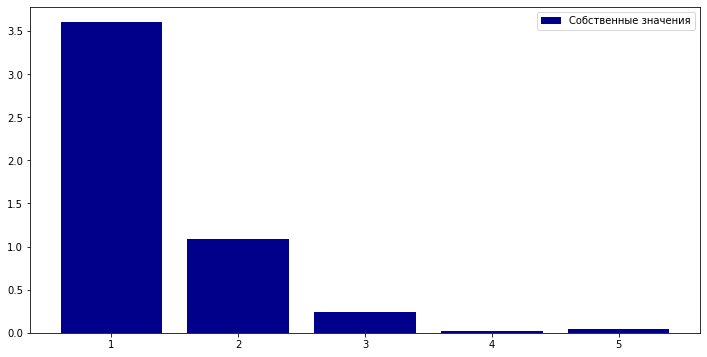

In [122]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
ax.bar(range(1, len(eig_values)+1), eig_values, label = 'Собственные значения', color = 'darkblue')
ax.legend()
plt.show()

Два собственных вектора больше единицы - такое условие отбора применяется в метода главных компонент

#### Процент дисперсии переменной объясненный фактором

In [123]:
eig_values / np.sum(eig_values)*100

array([72.00023991, 21.79970602,  4.89849608,  0.37143041,  0.93012757])


#### Объясненная суммарная дисперсия

In [124]:
np.cumsum(eig_values)/ np.sum(eig_values)*100

array([ 72.00023991,  93.79994594,  98.69844202,  99.06987243,
       100.        ])

Видим, что первый и второй фактор вносят наибольший вклда в объясненную дисперсию.

Не нормированные главные компоненты.
Собственные векторы - матрица перехода 
(матрица вращения, так как исходные данные центрированы)
Матрица счетов (score) - старые переменные в новой системе координат

In [135]:
score = X_normalise @ (eig_vectors)
score

array([[-1.13862166, -0.48584875,  0.99382349,  0.00837424,  0.03674857],
       [-1.02414119, -0.74084278, -0.07947531, -0.1209196 ,  0.14185255],
       [-0.71111189, -0.82516912, -0.63582199, -0.04870469,  0.14425596],
       [-1.37438505,  0.3539239 , -0.22758684,  0.27527467, -0.02436904],
       [-1.25589657,  1.35826241, -0.11257435, -0.13313796, -0.30366052],
       [ 3.01187459, -1.06431891, -0.0187283 ,  0.02800635, -0.26568503],
       [ 2.49228177,  1.40399326,  0.08036332, -0.00889301,  0.2708575 ]])

In [136]:
factors1 = np.array([np.array(a / np.sqrt(b)) for a, b in zip(score.T, eig_values)]).T
factors1

array([[-0.60010531, -0.46536184,  2.00813484,  0.06144998,  0.17040573],
       [-0.5397689 , -0.70960347, -0.16058903, -0.88730511,  0.65778036],
       [-0.37478825, -0.790374  , -1.28475158, -0.35739385,  0.66892512],
       [-0.72436331,  0.3389999 , -0.45986543,  2.0199588 , -0.11300098],
       [-0.66191451,  1.30098821, -0.22746945, -0.97696309, -1.40809537],
       [ 1.58739464, -1.0194395 , -0.03784269,  0.20550992, -1.23200032],
       [ 1.31354564,  1.34479071,  0.16238334, -0.06525666,  1.25598546]])

#### Матрица нагрузок (диагональные элементы)

In [137]:
from scipy.stats.stats import pearsonr

In [138]:
matrix_of_volt = np.array([[pearsonr(X_normalise[:,i],factors1[:,j])[0] for j in range(0, 5)] for i in range(0,5)])
matrix_of_volt

array([[-0.89610991,  0.39790262,  0.14700564,  0.07394265,  0.10762138],
       [ 0.81503399,  0.56360092, -0.01613561, -0.06578346,  0.11612827],
       [-0.90484383,  0.04473558, -0.4214645 , -0.01807167,  0.03602025],
       [ 0.8469578 ,  0.48572104, -0.18848317,  0.0782748 , -0.0713071 ],
       [ 0.77242394, -0.613259  , -0.09947643,  0.04819763,  0.12270323]])